<h1 style='text-align:center;'>Facility Location (P-Median) Problem for Meal Delivery Optimization</h1>
<br>
<br>
<h4>Course:</h4>
<br><h2 style='text-align:center;'>OPERATION RESEARCH FOR STRATEGIC DECISIONS: MODELS, METHODS</h2><br>

<h2>Problme Definition:</h2>
<p>In this section, we outline the context and objectives of the project. A food supply company has a contract to provide meals to 12 private offices in Tehran for a year. The company aims to minimize costs while ensuring customer satisfaction by delivering hot meals on time. The locations of customers and potential kitchen facilities are visualized on a map.</p>

<h3>Key Points:</h3>
<ul>
    <li><b>Contract Duration:</b> One year</li>
    <li><b>Customer Base:</b> 12 private offices</li>
    <li><b>Kitchen Locations:</b> 10 possible kitchens with varying fixed costs</li>
    <li><b>Service Requirement:</b> Each customer must be served 300 days a year</li>
    <li><b>Distance and Cost Metrics:</b> The cost of service is determined by distance and fuel consumption.</li>
</ul>

<h2>Solution Approach:</h2>
<p>To find optimized solutions, I visualize the coordinates of both facilities and customers using the <code>Folium library</code>. A <b>P-median</b> approach is employed to calculate costs and determine the best kitchen facilities to rent.</p>

<h2>Objective Function:</h2>
<p>The objective is to minimize the total cost, represented mathematically as:</p>
<h2>$$Min\sum_{j=1}^{10}f_{j}y_{j}+\sum_{i=1}^{12}\sum_{j=1}^{10}c_{ij}x_{ij}$$</h2>

<h2>Constraints:</h2>
<h5>1 - Each customer $i$ must be served by exactly one facility:</h5>
<h2>$$\sum_{j=1}^{10}x_{ij}=1$$</h2>

<h5>2 - A customer $i$ can only be served by an active facility $j$:</h5>
<h2>$$\sum_{i=1}^{12}x_{ij}\leqslant My_{j}$$</h2>

<h5>3 - The total number of active facilities must equal $P$:</h5>
<h2>$$\sum_{j=1}^{10}y_{j}= P$$</h2>

<h2>Decisional Variables:</h2> 
<p>Binary variables indicating service assignments and facility activations:</p>
<h2>$$x_{ij},y_{j}\in \begin{Bmatrix}0&,&1\end{Bmatrix}$$</h2>

<h1>Import Libraries</h1>

In [1]:
import folium
from folium import plugins
import pandas as pd
import pulp as p
import numpy as np
import matplotlib.pyplot as plt

<h3>Comment:</h3>
<p>Libraries such as <code>folium</code> for mapping, <code>pulp</code> for optimization, and <code>pandas</code> for data manipulation are imported. <code>numpy</code> and <code>matplotlib</code> are used for numerical operations and visualization, respectively.</p>

<h2>Facilities Information</h2>
<p>Here, I create a DataFrame to store information about the kitchen facilities, including their coordinates, names, and fixed costs.</p>

In [2]:
# Create a DataFrame for facility locations and information to show on the map
facilities_data = pd.DataFrame({
   'latitude':[35.7097, 35.7111, 35.7386, 35.7448, 35.7422, 35.7385, 35.7247, 35.7651, 35.7106, 35.6393],
   'longitude':[51.3944, 51.4416, 51.5121, 51.5698, 51.5279, 51.5250, 51.5224, 51.4558,  51.4679,  51.4744],
    'name':['f1', 'f2' , 'f3' , 'f4' , 'f5' , 'f6' , 'f7' , 'f8' , 'f9' , 'f10'],
    'fixed cost':[250, 372, 221, 452, 369,  325, 415, 303, 412, 258]
}, dtype=str)

<h3>Comment:</h3>
<p>The DataFrame <code>facilities_data</code> is created to hold the latitude, longitude, names, and fixed costs of each kitchen facility.

In [3]:
facilities_data

,latitude,longitude,name,fixed cost
0,35.7097,51.3944,f1,250
1,35.7111,51.4416,f2,372
2,35.7386,51.5121,f3,221
3,35.7448,51.5698,f4,452
4,35.7422,51.5279,f5,369
5,35.7385,51.525,f6,325
6,35.7247,51.5224,f7,415
7,35.7651,51.4558,f8,303
8,35.7106,51.4679,f9,412
9,35.6393,51.4744,f10,258


<h1>Customers Information</h1>
<p>Similarly, I create a DataFrame for customer locations.</p>

In [4]:
# Create a DataFrame for customer locations and information to show on the map
customers_data = pd.DataFrame({
   'latitude':[35.6988, 35.7118, 35.7157, 35.7171, 35.7092, 35.7264, 35.7564, 35.7364, 35.7396, 35.7237, 
               35.7461, 35.7405],
   'longitude':[51.4133, 51.4685, 51.3940, 51.4072, 51.4258,  51.4282, 51.5128, 51.5139, 51.5264, 51.5240, 
                51.5727, 51.5258],
   'name':['c1', 'c2','c3', 'c4' , 'c5' , 'c6' , 'c7' ,'c8' , 'c9' , 'c10' , 'c11' , 'c12']
}, dtype=str)

<h3>Comment:</h3>
<p>The DataFrame <code>customers_data</code> contains the latitude, longitude, and names of the customers.</p>

In [5]:
customers_data

,latitude,longitude,name
0,35.6988,51.4133,c1
1,35.7118,51.4685,c2
2,35.7157,51.394,c3
3,35.7171,51.4072,c4
4,35.7092,51.4258,c5
5,35.7264,51.4282,c6
6,35.7564,51.5128,c7
7,35.7364,51.5139,c8
8,35.7396,51.5264,c9
9,35.7237,51.524,c10


<h1>Showing Both Customers and Facilities on the Map</h1>
<p>The following function visualizes both customer and facility locations on the map.</p>

In [6]:
import folium
from folium import plugins

def mapShow(customers_data, facilities_data):
    m = folium.Map(location=[35.6800, 51.4786], tiles="Stamen Terrain", zoom_start=11)

    # Get coordinate by clicking on the map
    m.add_child(folium.LatLngPopup())

    # Add tiles to map with proper attribution
    folium.TileLayer('Open Street Map', attr='Map data © OpenStreetMap contributors').add_to(m)
    folium.TileLayer('Stamen Terrain', 
                     attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors').add_to(m)
    folium.TileLayer('Stamen Toner', 
                     attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors').add_to(m)
    folium.TileLayer('Stamen Watercolor', 
                     attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors').add_to(m)
    folium.TileLayer('CartoDB Positron', attr='© OpenStreetMap contributors, © CartoDB').add_to(m)
    folium.TileLayer('CartoDB Dark_Matter', attr='© OpenStreetMap contributors, © CartoDB').add_to(m)

    # Add layer control to show different maps
    folium.LayerControl().add_to(m)

    # Measure Control tool
    measure_control = plugins.MeasureControl(position='topleft', active_color='red', completed_color='red', 
                                             primary_length_unit='meters')
    # Add measure control to map
    m.add_child(measure_control)

    # Add markers for Facilities on the map
    for i in range(len(facilities_data)):
        location = [facilities_data.iloc[i]['latitude'], facilities_data.iloc[i]['longitude']]
        icon = folium.DivIcon(html=f"""<div><svg width="60" height="60">
                                          <circle cx="30" cy="30" r="10" fill="yellow" /></svg></div>""")
        html = f"""<p>{facilities_data.iloc[i]['name']}</p>
                    <p>Fixed Cost [Rial]: {facilities_data.iloc[i]['fixed cost']}</p>"""
        
        iframe = folium.IFrame(html=html, width=200, height=100)
        popups = folium.Popup(iframe, max_width=2650)

        folium.Marker(location=location, popup=popups, icon=icon).add_to(m)

    # Add markers for Customers on the map
    for i in range(len(customers_data)):
        location = [customers_data.iloc[i]['latitude'], customers_data.iloc[i]['longitude']]
        html = f"""<center><p>{customers_data.iloc[i]['name']}</p></center>"""
        icon = folium.DivIcon(html=f"""<div><svg>
                                          <rect width="20" height="20" fill="red" /></svg></div>""")
        iframe = folium.IFrame(html=html, width=50, height=50)
        popups = folium.Popup(iframe, max_width=2650)

        folium.Marker(location=location, popup=popups, icon=icon).add_to(m)

    # Show the map
    return m

<h3>Comment:</h3>
<p>This function initializes a <code>Folium</code> map, adds different tile layers for visualization, and places markers for both facilities (yellow circles) and customers (red squares) based on their coordinates.</p>

In [7]:
mapShow(customers_data, facilities_data)

<h1>Initial Data</h1>
<p>In this section, I calculate distances and service costs based on the distance matrix.</p>

In [8]:
distances = np.array([[1995, 2923, 9956, 15009, 11430, 11021, 10265, 8247, 5089 , 8666],
                         [6695, 2438, 4939, 9863, 6340, 5905, 5081, 6028, 149, 8100],
                         [677, 4338, 10966,  16201, 12449, 12100, 11645, 7828, 6706, 11190],
                         [1417,  3188, 9773, 15004, 11254, 10903, 10443, 6907, 5539, 10581],
                         [2826, 1450, 8454, 13594, 9925, 9534, 8898, 6774, 3813, 8939],
                         [3568, 2102, 7701 , 12951, 9178 , 8849,8515,  4968, 4005, 10558],
                         [11877, 8165, 1988, 5315, 2100, 2287, 3641, 5221, 6510, 13482],
                         [11182, 7102,  281, 5139, 1424, 1037, 1524,  6125, 5045, 11379],
                         [12373, 8280, 1296, 3953, 311, 179, 1700, 6962, 6194, 12105],
                         [11794, 7562, 1966, 4753, 2078, 1636, 166, 7672, 5264, 10404],
                         [16589, 12452,  5524,  295, 4057, 4379, 5122, 10748, 10245, 14828],
                         [12347, 8268, 1248, 4007, 269, 238, 1796, 6872, 6201, 12181]])


customers = ['c1', 'c2','c3', 'c4' , 'c5' , 'c6' , 'c7' ,'c8' , 'c9' , 'c10' , 'c11' , 'c12']
facilities = ['f1', 'f2' , 'f3' , 'f4' , 'f5' , 'f6' , 'f7' , 'f8' , 'f9' , 'f10']
fixed_costs = [250, 372, 221, 452, 369,  325, 415, 303, 412, 258]

service_costs = distances * 300 * 2 * 0.2 * 0.5 * 0.001

<h3>Comment:</h3>
<p>The distances array holds the distances between each customer and facility. The <code>service_costs</code> array calculates the total service costs using the given formula based on distance, fuel consumption, and other parameters:</p>
<center><pre>Service Cost [Euro] = Distance [km] * Cost [Euro/km] * Round * Fuel Price [Euro]</pre></center>

In [9]:
print(service_costs)

[[119.7  175.38 597.36 900.54 685.8  661.26 615.9  494.82 305.34 519.96]
 [401.7  146.28 296.34 591.78 380.4  354.3  304.86 361.68   8.94 486.  ]
 [ 40.62 260.28 657.96 972.06 746.94 726.   698.7  469.68 402.36 671.4 ]
 [ 85.02 191.28 586.38 900.24 675.24 654.18 626.58 414.42 332.34 634.86]
 [169.56  87.   507.24 815.64 595.5  572.04 533.88 406.44 228.78 536.34]
 [214.08 126.12 462.06 777.06 550.68 530.94 510.9  298.08 240.3  633.48]
 [712.62 489.9  119.28 318.9  126.   137.22 218.46 313.26 390.6  808.92]
 [670.92 426.12  16.86 308.34  85.44  62.22  91.44 367.5  302.7  682.74]
 [742.38 496.8   77.76 237.18  18.66  10.74 102.   417.72 371.64 726.3 ]
 [707.64 453.72 117.96 285.18 124.68  98.16   9.96 460.32 315.84 624.24]
 [995.34 747.12 331.44  17.7  243.42 262.74 307.32 644.88 614.7  889.68]
 [740.82 496.08  74.88 240.42  16.14  14.28 107.76 412.32 372.06 730.86]]


<h1>Integer Linear Programming Model (ILPM) by Pulp:</h1>
<p>The following function defines the ILP model using the <code>Pulp</code> library.</p>

In [10]:
def ilp_model(f, c, pVal):
    n_c = len(c)
    n_f = len(f)
    
    # Initialize the LP problem
    model = p.LpProblem('P-Median', p.LpMinimize)
    
    # Decision variables for facilities
    y = [p.LpVariable(name=facilities[j], cat=p.LpBinary) for j in range(n_f)]
    
    # Decision variables for customer-facility assignments
    x = [[p.LpVariable(name=f"{customers[i]}_{facilities[j]}", cat=p.LpBinary) for j in range(n_f)] for i in range(n_c)]
    
    # Objective function
    model += p.lpSum(fixed_costs[j] * y[j] for j in range(n_f)) +\
                                    p.lpSum(service_costs[i][j] * x[i][j] for i in range(n_c) for j in range(n_f))

    # Constraints: Each customer is served by one facility
    for i in range(n_c):
        model += p.lpSum(x[i][j] for j in range(n_f)) == 1

    # Constraints: A customer is served by an active facility
    for i in range(n_c):
        for j in range(n_f):
            model += x[i][j] <= y[j]

    # Constraint: Required number of active facilities
    model += p.lpSum(y[j] for j in range(n_f)) == pVal
    
    # Solve the model
    status = model.solve()
    
    print("Status:", p.LpStatus[status])  
    print("Objective Value:", p.value(model.objective))
    
    return [p.value(y[j]) > 0.5 for j in range(n_f)]  # Return the selected facilities

<h3>Comment:</h3>
<p>Here, I define the integer linear programming model with decision variables, an objective function, and constraints using the <code>Pulp</code> library. The <code>solve()</code> method finds the optimal solution. <code>Pulp</code> primarily uses the <b>COIN-OR CBC</b> solver by default, which is a <b>mixed-integer linear programming</b> solver.
    This solver employs the <b>branch-and-bound algorithm</b>, a common approach for solving integer programming problems, ensuring that the solution satisfies all constraints while minimizing the objective function.</p>


<h1>Heuristic Method (Greedy Algorithm):</h1>
<p>The greedy algorithm selects facilities based on minimizing costs iteratively.</p>

In [11]:
# Greedy constructive algorithm
def greedy(f, c, pVal):
    n_c = len(c)
    n_f = len(f)
    out = [False] * n_f
    # it activates all the required facilities by always choosing the one that minimizes the objective function
    for k in range(pVal):
        selected = -1
        objSelected = 0
        for j in range(n_f):
            if not out[j]:
                out[j] = True
                obj = evaluate_out(f, c, out)
                out[j] = False
                if selected == -1 or objSelected > obj:
                    selected = j
                    objSelected = obj
        if selected >= 0:
            out[selected] = True
    return out

<h3>Comment:</h3>
<p>This function implements a greedy algorithm where it iteratively selects the facility that minimizes the total cost until the required number of facilities is chosen.</p>

<h1>Evaluation Function:</h1>
<p>This function evaluates the output from different optimization models (Pulp and Heuristic methods).</p>

In [12]:
def evaluate_out(f, c, ris):
    n_c = len(c)
    n_f = len(f)
    cost = 0
    # Calculate the total cost based on active facilities
    for j in range(n_f):
        if ris[j]:
            cost += fixed_costs[j]
  
    # Calculate the service costs for each customer
    for i in range(n_c):
        cf = 100000000000000
        for j in range(n_f):
            if ris[j]:
                if cf > service_costs[i][j]:
                    cf = service_costs[i][j]
        cost += cf
    return cost

<h3>Comment:</h3>
<p>This function sums the fixed costs of active facilities and the service costs for each customer based on the closest available facility.</p>

<h1>Full Function Evaluation</h1>
<p>This function combines the ILP and Greedy methods and evaluates their results.</p>

In [13]:
def fullFunc(facilities, customers, p):
    print("\n" + "="*50)
    print("ILPM results for P =", p, ":\n")
    res_ilpm = ilp_model(facilities, customers, p)
    eval_ilpm = evaluate_out(facilities, customers, res_ilpm)
    
    res_greedy = greedy(facilities, customers, p)
    eval_greedy = evaluate_out(facilities, customers, res_greedy)

    print("Selected Facilities (ILPM):", res_ilpm)
    print("Evaluated value for ILPM: ", np.round(eval_ilpm,2))
    
    print("Heuristic Method results for P =", p, ":\n")
    print("Selected Facilities (Greedy):", res_greedy)
    print("Objective value for Heuristic Method = ", np.round(eval_greedy,2))
    
    print("\n" + "="*50)


<h3>Comment:</h3>
<p>This function runs both the ILP and the Greedy method for a given $P$ value, prints the results, and evaluates the costs from both approaches.</p>

<h1>Running Evaluations for Different $P$ Values</h1>
<p>This loop evaluates and displays the results for $P$ values ranging from 1 to 7.</p>

In [14]:
for i in range(1, 8):
    fullFunc(facilities, customers, i)


ILPM results for P = 1 :

Status: Optimal
Objective Value: 4066.5200000000004
Selected Facilities (ILPM): [False, False, True, False, False, False, False, False, False, False]
Evaluated value for ILPM:  4066.52
Heuristic Method results for P = 1 :

Selected Facilities (Greedy): [False, False, True, False, False, False, False, False, False, False]
Objective value for Heuristic Method =  4066.52


ILPM results for P = 2 :

Status: Optimal
Objective Value: 2134.5
Selected Facilities (ILPM): [True, False, True, False, False, False, False, False, False, False]
Evaluated value for ILPM:  2134.5
Heuristic Method results for P = 2 :

Selected Facilities (Greedy): [True, False, True, False, False, False, False, False, False, False]
Objective value for Heuristic Method =  2134.5


ILPM results for P = 3 :

Status: Optimal
Objective Value: 2137.1
Selected Facilities (ILPM): [True, True, False, False, False, True, False, False, False, False]
Evaluated value for ILPM:  2137.1
Heuristic Method resu

<h1>Visualization of Costs</h1>
<p>A bar chart is created to compare the total costs associated with different numbers of selected facilities ($P$). This visualization aids in understanding the cost implications of varying facility numbers.</p>

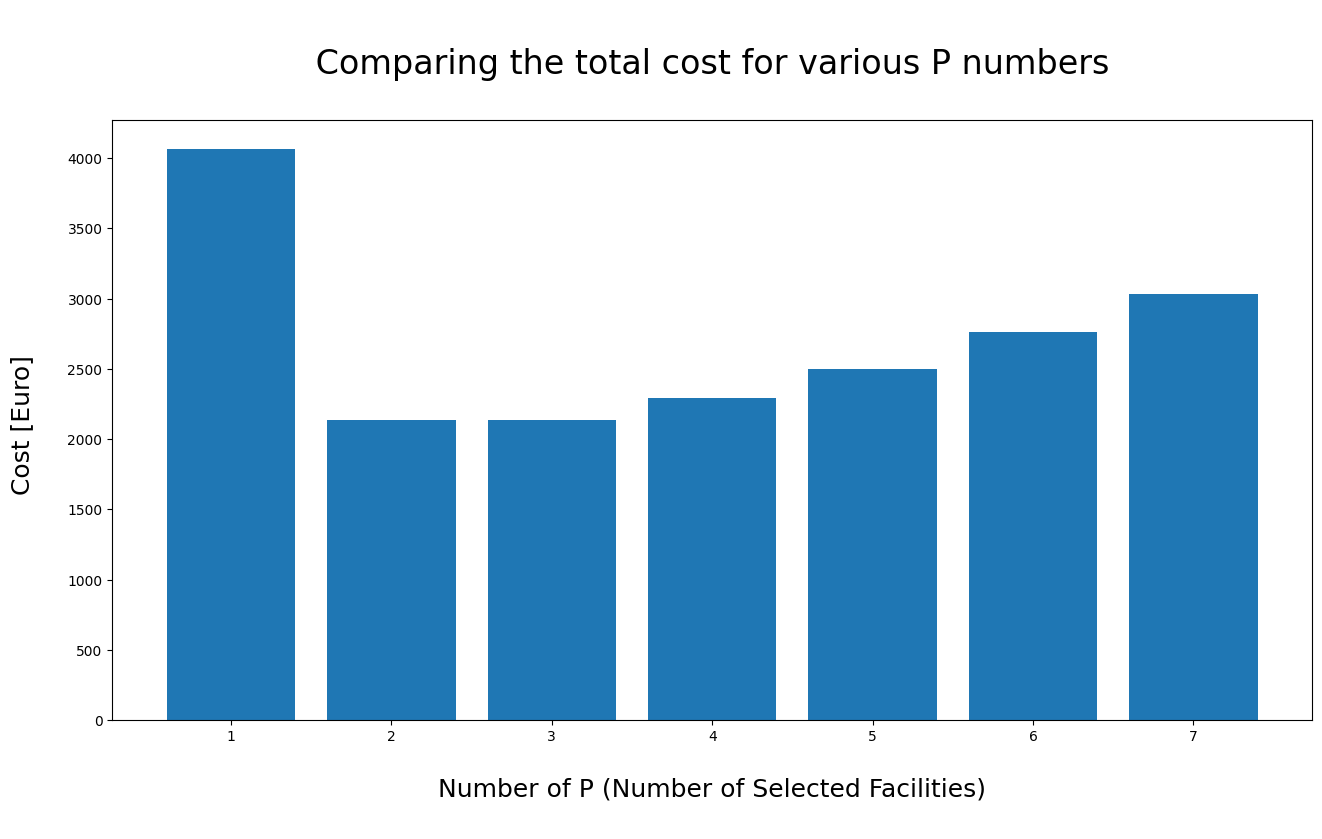

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('\n Number of P (Number of Selected Facilities) \n',fontsize=18)
ax.set_ylabel('Cost [Euro] \n',fontsize=18)
ax.set_title('\n Comparing the total cost for various P numbers \n',fontsize=24)
p_number = ['1', '2', '3', '4', '5','6','7']
costs = [4066.52,2134.5,2137.1,2294.79,2501.75,2759.75,3034.41]
ax.bar(p_number, costs)
plt.show()

<h3>Comment:</h3>
<p>Based on the evaluations, the most optimized options are found for 2 or 3 facilities.</p>

<h1>Visualizing $P = 2$ Selected Facilities on the Map</h1>

In [16]:
p2 = pd.DataFrame({
   'latitude':[35.7097, 35.7386],
   'longitude':[51.3944, 51.5121],
    'name':['f1', 'f3'],
    'fixed cost':[250, 221]
}, dtype=str)

In [17]:
mapShow(customers_data, p2)

<h1>Visualizing $P = 3$ Selected Facilities on the Map</h1>

In [18]:
p3 = pd.DataFrame({
   'latitude':[35.7097, 35.7111, 35.7385],
   'longitude':[51.3944, 51.4416, 51.5250],
    'name':['f1', 'f2' , 'f6'],
    'fixed cost':[250, 372, 325]
}, dtype=str)

In [19]:
mapShow(customers_data, p3)

<h1>Result Summary of Optimization Methods</h1>
<p>This summary compares the costs and selected facilities across various optimization methods, including Pulp, Python Heuristic, Excel Solver, and Excel Heuristic for different values of $P$.</p>

<div>
<table style="width:100%">
  <tr>
    <th style='text-align: center;'>P Number</th>
    <th style='text-align: center;'>Cost Calculated by Pulp</th>
    <th style='text-align: center;'>Cost Calculated by Python Heuristic</th>
    <th style='text-align: center;'>Cost Calculated by Excel solver</th>
    <th style='text-align: center;'>Cost Calculated by Excel Heuristic</th>
    <th style='text-align: center;'>Facilities Selected</th>
  </tr>
  <tr>
    <td style='text-align: center;'>1</td>
    <td style='text-align: center;'>4066.5</td>
    <td style='text-align: center;'>4066.5</td>
    <td style='text-align: center;'>NOT OPTIMIZED (4114.24)</td>
      <td style='text-align: center;'>4066.52</td>
      <td style='text-align: center;'>3</td>
  </tr>
  <tr>
    <td style='text-align: center;'>2</td>
    <td style='text-align: center;'>2134.5</td>
    <td style='text-align: center;'>2134.5</td>
    <td style='text-align: center;'>2134.5</td>
      <td style='text-align: center;'>2134.5</td>
      <td style='text-align: center;'>1 , 3</td>
  </tr>
  <tr>
    <td style='text-align: center;'>3</td>
    <td style='text-align: center;'>2137.1</td>
    <td style='text-align: center;'>2185.9</td>
    <td style='text-align: center;'>2137.1</td>
      <td style='text-align: center;'></td>
      <td style='text-align: center;'>1 , 2 , 6</td>
  </tr>
  <tr>
    <td style='text-align: center;'>4</td>
    <td style='text-align: center;'>2294.7</td>
    <td style='text-align: center;'>2294.7</td>
    <td style='text-align: center;'>2294.8</td>
         <td style='text-align: center;'></td>
    <td style='text-align: center;'>1 , 2 , 3 , 6</td>
  </tr>
    <tr>
    <td style='text-align: center;'>5</td>
    <td style='text-align: center;'>2501.7</td>
    <td style='text-align: center;'>2501.7</td>
    <td style='text-align: center;'></td>
     <td style='text-align: center;'></td>
     <td style='text-align: center;'>1 , 2 , 3 , 4 , 6</td>
  </tr>
  <caption style='text-align: center;'>Comparing the results</caption>
</table>
</div>

<h2>Key Insights</h2>
<h3>1 - Cost Consistency:</h3>
<ul>
<li>For $P = 1$ and $P = 2$, both the Pulp and Python Heuristic methods produced identical results, demonstrating strong consistency in their optimization.</li>
<li>The Excel Solver matches the Pulp results for $P = 2$ and $P = 3$, indicating its effectiveness for these scenarios.</li>
</ul>
<h3>2 - Excel Solver Performance:</h3>
<ul>
<li>The Excel Solver showed a notable optimization at $P = 1$, where it identified a higher cost (4114.24) compared to the Pulp and Heuristic methods, indicating that it did not effectively minimize costs in this instance.</li>
</ul>
<h3>3 - Facility Selections:</h3>
<ul>
    <li>
The selected facilities varied across optimization methods, highlighting the differences in decision-making between the algorithms. For example, at $P = 3$, the Python Heuristic selected a different combination of facilities compared to Pulp.</li>
</ul>